In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv("GridshotUltimate.csv")
y = data["killTotal"][::-1]

X = list(range(1, len(y) + 1))

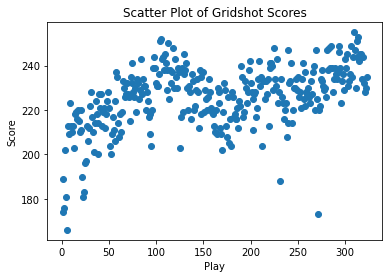

In [5]:
plt.scatter(X, y)
plt.xlabel('Play')
plt.ylabel('Score') 
plt.title('Scatter Plot of Gridshot Scores')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

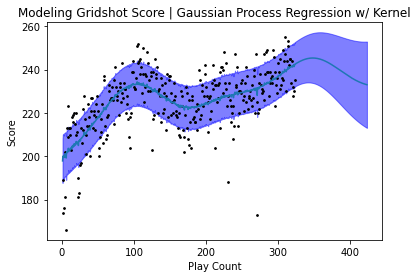

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
import random

random.seed(1337)

#Long-term, Smooth Rising Trend
k1 = 1500 * RBF(length_scale=125)    #1500 makes the model smoother

#Seasonal Component
k2 = 5 * ExpSineSquared(length_scale=125, periodicity=125, #the term 5 in front of the ExpSineSquared kernel serves to adjust its contribution to the overall model, making its effects more pronounced or less pronounced
                     periodicity_bounds="fixed")  

#White Noise
k3 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-5, np.inf))

#Combine Kernels
kernel = k1 + k2 + k3


#Fit Regressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=.1,
                              normalize_y=True)

X = np.array(X)
Y = np.array(y)
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

gp.fit(X, Y)

#Create future X values
X_ = np.linspace(X.min(), X.max() + 100, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

y_pred = y_pred.flatten()
y_std = y_std.flatten()
X_ = X_.flatten()


plt.plot(X_, y_pred)
plt.fill_between(X_, y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='blue')
plt.scatter(X, Y, c='k', s=3)
plt.xlabel('Play Count')
plt.ylabel('Score')
plt.title("Modeling Gridshot Score | Gaussian Process Regression w/ Kernel")
plt.show